# Life Expectancy and GDP
### This jupyter notebook project expresses some relationships between data about life expectancy and GDP in different countries, between the years 2000 and 2015.
##### This project is part of my journey in the Data Scientist path from Codecademy


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
life_gdp_data = pd.read_csv('all_data.csv')

life_gdp_data = life_gdp_data.rename({"Life expectancy at birth (years)":"LEXP"}, axis="columns")
print(life_gdp_data)


     Country  Year  LEXP           GDP
0      Chile  2000  77.3  7.786093e+10
1      Chile  2001  77.3  7.097992e+10
2      Chile  2002  77.8  6.973681e+10
3      Chile  2003  77.9  7.564346e+10
4      Chile  2004  78.0  9.921039e+10
..       ...   ...   ...           ...
91  Zimbabwe  2011  54.9  1.209845e+10
92  Zimbabwe  2012  56.6  1.424249e+10
93  Zimbabwe  2013  58.0  1.545177e+10
94  Zimbabwe  2014  59.2  1.589105e+10
95  Zimbabwe  2015  60.7  1.630467e+10

[96 rows x 4 columns]


                    Country      LEXP           GDP
0                     Chile  78.94375  1.697888e+11
1                     China  74.26250  4.957714e+12
2                   Germany  79.65625  3.094776e+12
3                    Mexico  75.71875  9.766506e+11
4  United States of America  78.06250  1.407500e+13
5                  Zimbabwe  50.09375  9.062580e+09


Text(0.5, 0, 'Average Life Expectancy by Country')

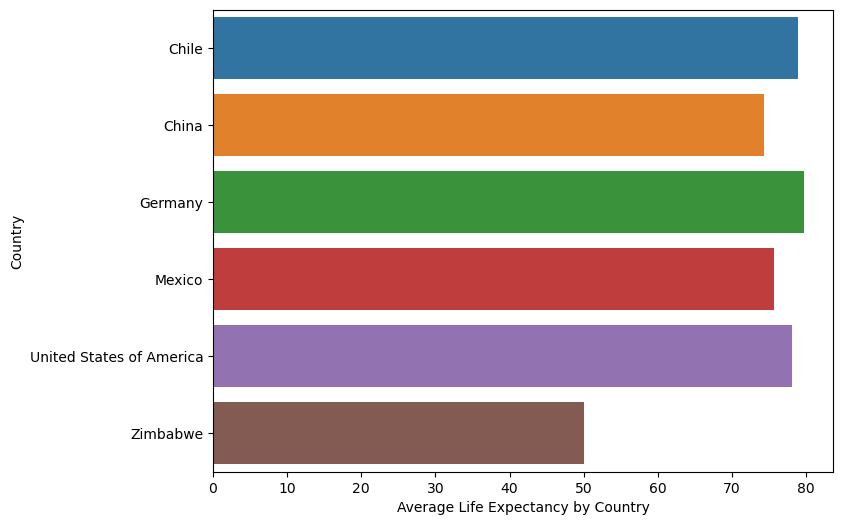

In [15]:
#Means

means = life_gdp_data.drop("Year", axis = 1).groupby("Country").mean().reset_index()
print(means)

plt.figure(figsize=(8,6))
sns.barplot(x="LEXP",y="Country", data = means)
plt.xlabel("Average Life Expectancy by Country")

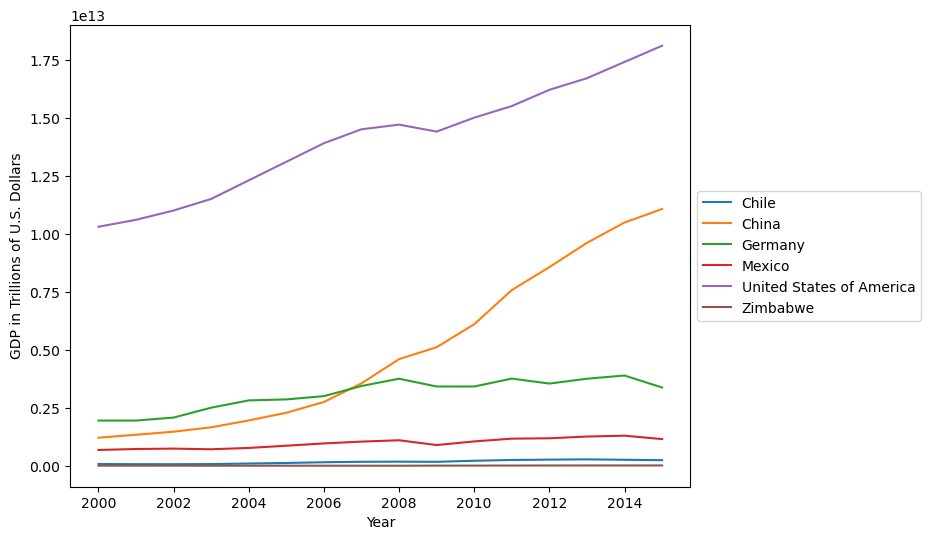

<Figure size 640x480 with 0 Axes>

In [16]:
#GDP - Years in one chart
plt.figure(figsize=(8,6))
sns.lineplot(x = life_gdp_data.Year, y = life_gdp_data.GDP, hue = life_gdp_data.Country)
plt.legend(loc="center left", bbox_to_anchor=(1,0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars")
plt.show()
plt.clf()

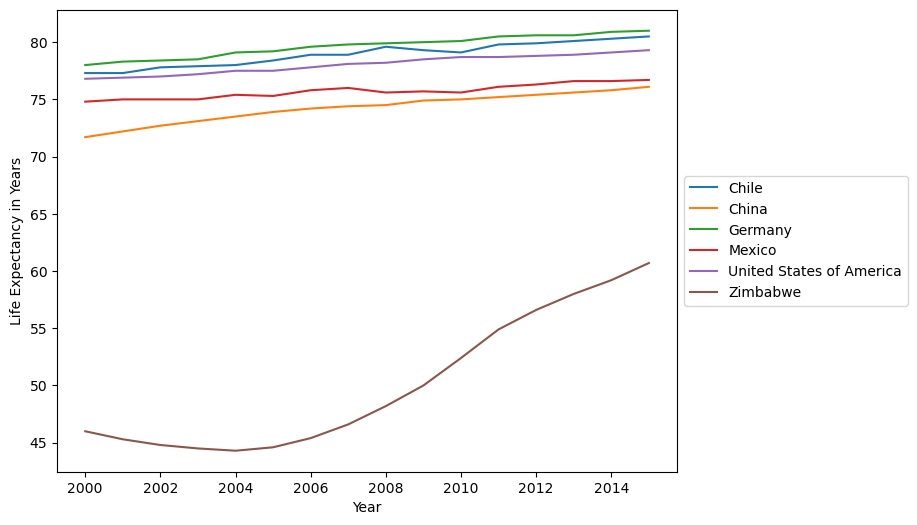

<Figure size 640x480 with 0 Axes>

In [18]:
#Life Expectancy (LEXP) -Time in one chart

plt.figure(figsize=(8,6))
sns.lineplot(x=life_gdp_data.Year, y=life_gdp_data.LEXP, hue= life_gdp_data.Country)
plt.legend(loc= "center left", bbox_to_anchor=(1,0.5), ncol=1)
plt.ylabel("Life Expectancy in Years")
plt.show()
plt.clf()

/Users/angelgonzaleztorres/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/angelgonzaleztorres/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 0, 'Life expectancy in years')

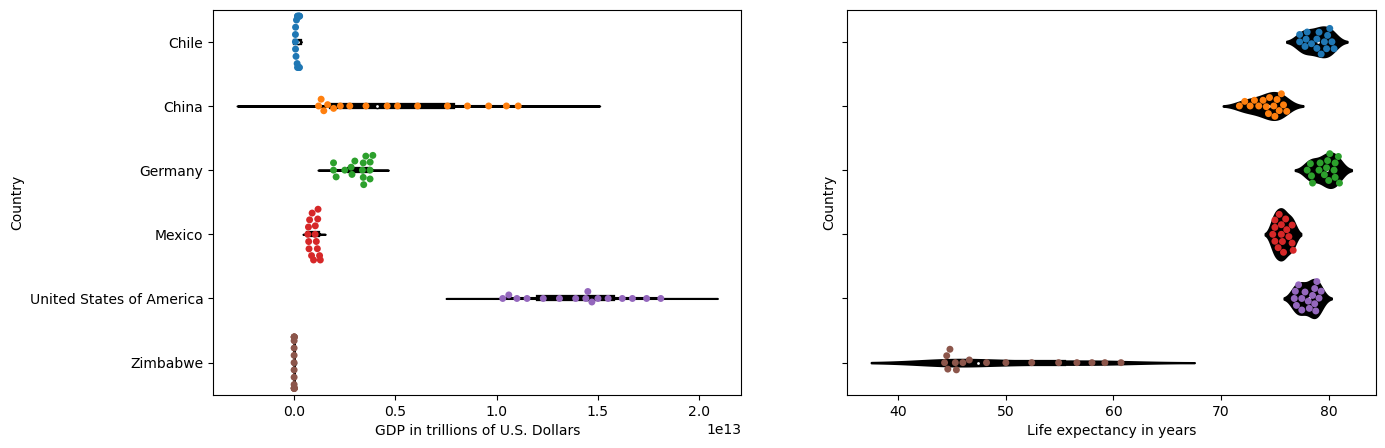

In [20]:
fig, axes = plt.subplots(1,2, sharey= True, figsize=(15,5))
axes[0] = sns.violinplot(ax = axes[0], x = life_gdp_data.GDP, y = life_gdp_data.Country, color="black")
axes[0] = sns.swarmplot(ax = axes[0],x = life_gdp_data.GDP, y = life_gdp_data.Country)
axes[0].set_xlabel("GDP in trillions of U.S. Dollars")
axes[1] = sns.violinplot(ax = axes[1],x = life_gdp_data.LEXP, y = life_gdp_data.Country, color="black")
axes[1] = sns.swarmplot(ax = axes[1],x = life_gdp_data.LEXP, y = life_gdp_data.Country)
axes[1].set_xlabel("Life expectancy at birth in years")



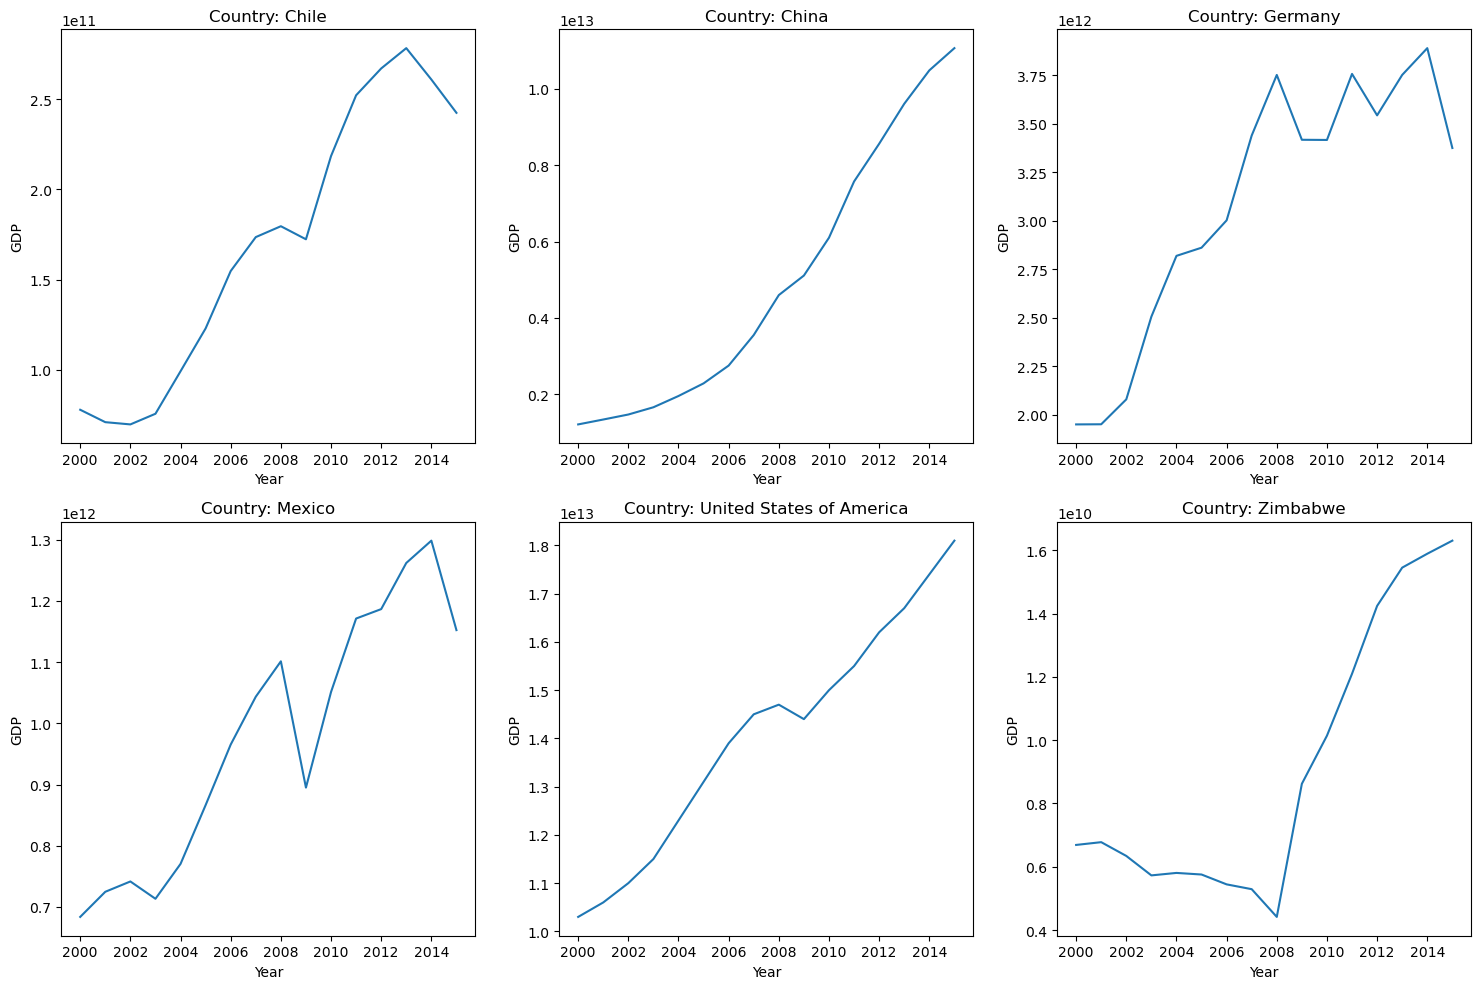

In [11]:
#GDP throughout time

countries = life_gdp_data['Country'].unique()

num_countries = len(countries)
num_columns = 3
num_rows = (num_countries + num_columns - 1)// num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5* num_rows))
axes = axes.flatten()

for i, country in enumerate(countries):
    ax = axes[i]
    country_data = life_gdp_data[life_gdp_data['Country']== country]
    sns.lineplot(data= country_data, x = "Year", y = "GDP", ax = ax)
    ax.set_title(f"Country: {country}")
    ax.set_xlabel("Year")
    ax.set_ylabel("GDP")
for j in range(i+1, len(axes)):
    plt.delaxes(axes[j])
    

    
plt.tight_layout()
plt.show()

    


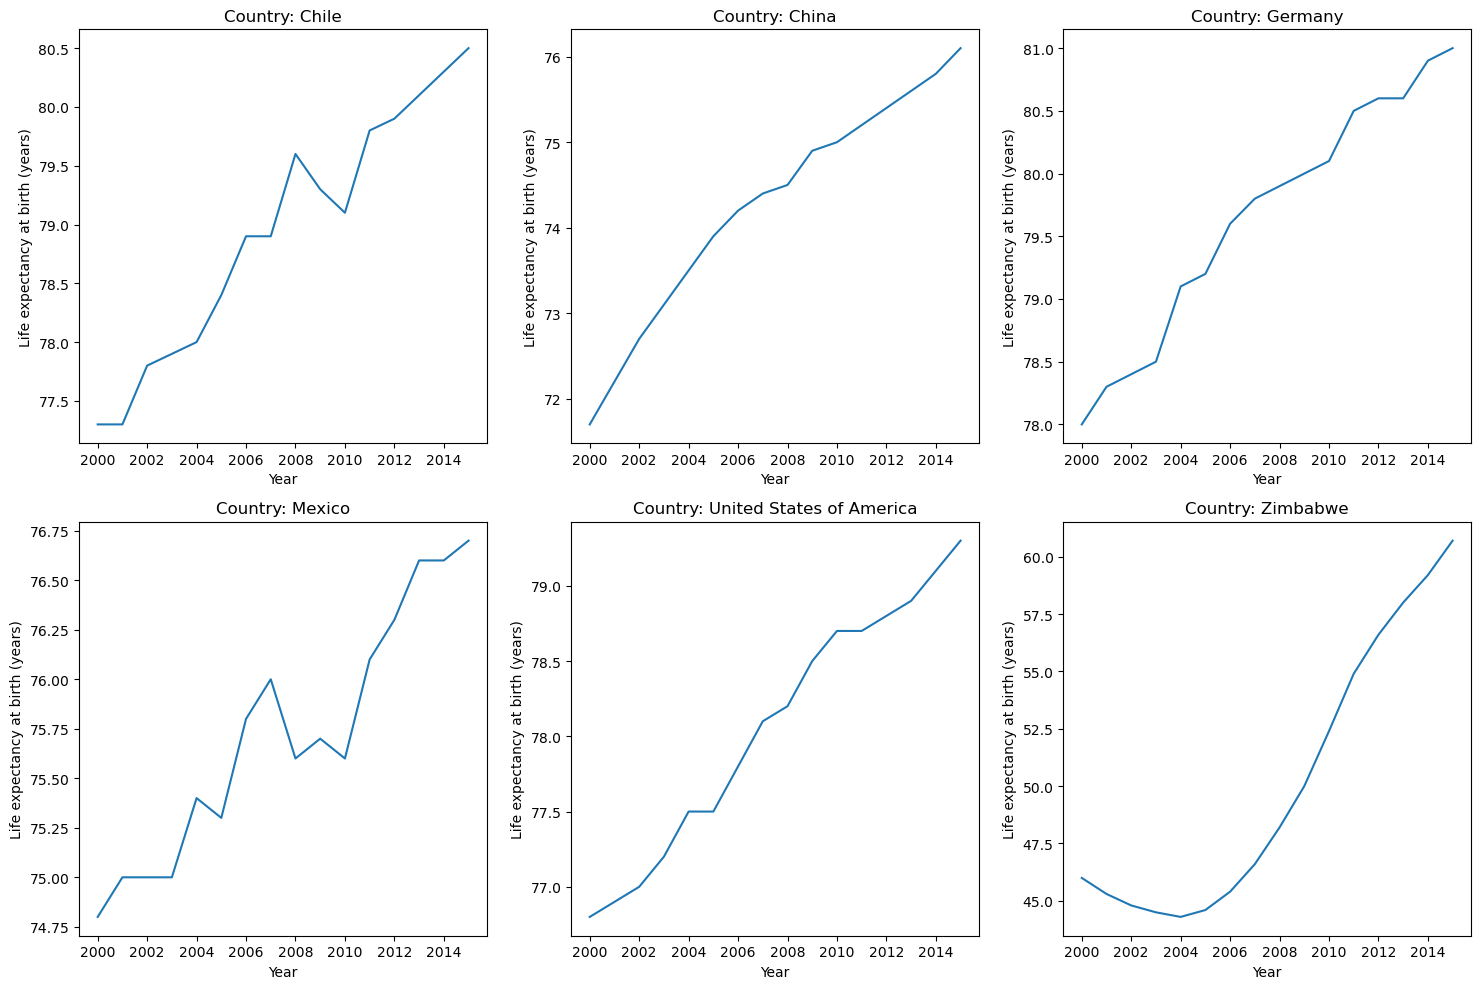

In [4]:
#Life expectancy at birth throughout time
countries = life_gdp_data['Country'].unique()

num_countries = len(countries)
num_columns = 3
num_rows = (num_countries + num_columns - 1)// num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5* num_rows))
axes = axes.flatten()

for i, country in enumerate(countries):
    ax = axes[i]
    country_data = life_gdp_data[life_gdp_data["Country"] == country]
    sns.lineplot(data = country_data, x = "Year", y = "Life expectancy at birth (years)", ax = ax)
    ax.set_title(f"Country: {country}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Life expectancy at birth (years)")
    
for j in range(i+1, len(axes)):
    plt.delaxes(axes[j])
    

    
plt.tight_layout()
plt.show()
    

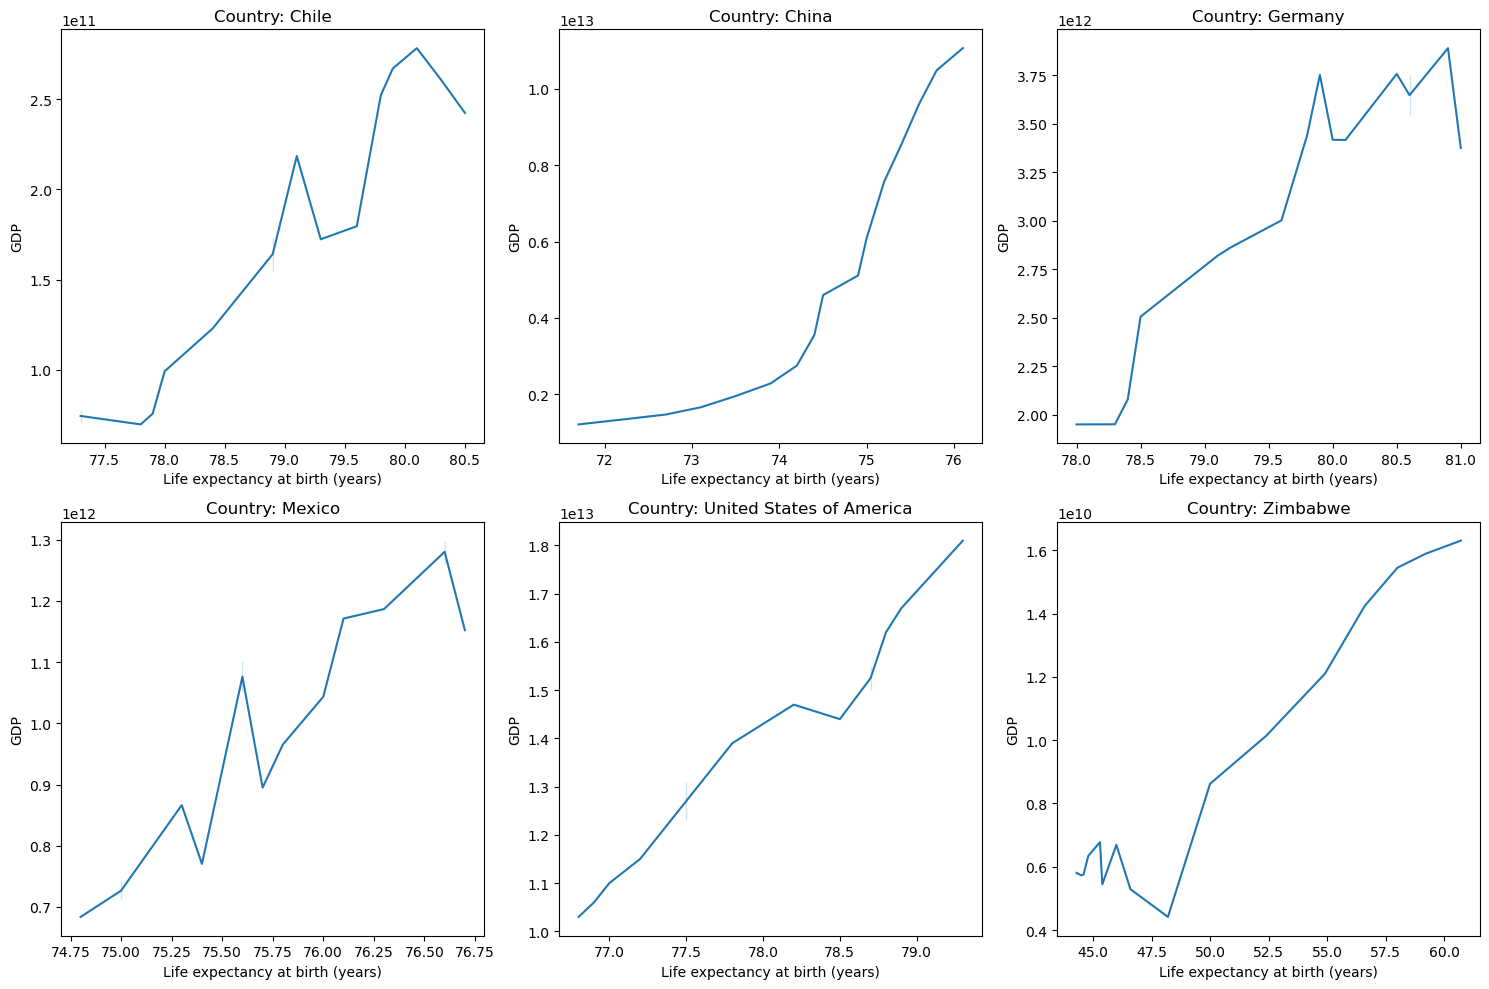

In [8]:
countries = life_gdp_data['Country'].unique()

num_countries = len(countries)
num_columns = 3
num_rows = (num_countries + num_columns - 1)// num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5* num_rows))
axes = axes.flatten()

for i, country in enumerate(countries):
    ax = axes[i]
    country_data = life_gdp_data[life_gdp_data["Country"] == country]
    sns.lineplot(data = country_data, x = "Life expectancy at birth (years)", y ="GDP" , ax = ax)
    ax.set_title(f"Country: {country}")
    ax.set_xlabel("Life expectancy at birth (years)")
    ax.set_ylabel("GDP")
    
for j in range(i+1, len(axes)):
    plt.delaxes(axes[j])
    

    
plt.tight_layout()
plt.show()
    

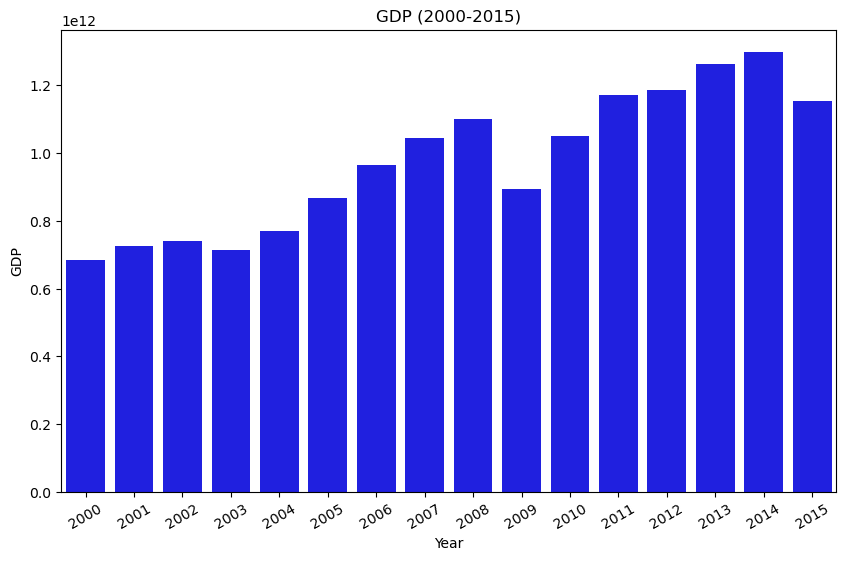

<Figure size 640x480 with 0 Axes>

In [5]:
mexicos_data = life_gdp_data[life_gdp_data.Country == "Mexico" ]
mexicos_data_avgLife = np.mean(mexicos_data["Life expectancy at birth (years)"])

plt.figure(figsize=(10,6))

sns.barplot(x="Year", y= "GDP", data = mexicos_data, color = "blue")
plt.title("GDP (2000-2015)")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.xticks(rotation = 30, fontsize = 10)
plt.show()
plt.clf()


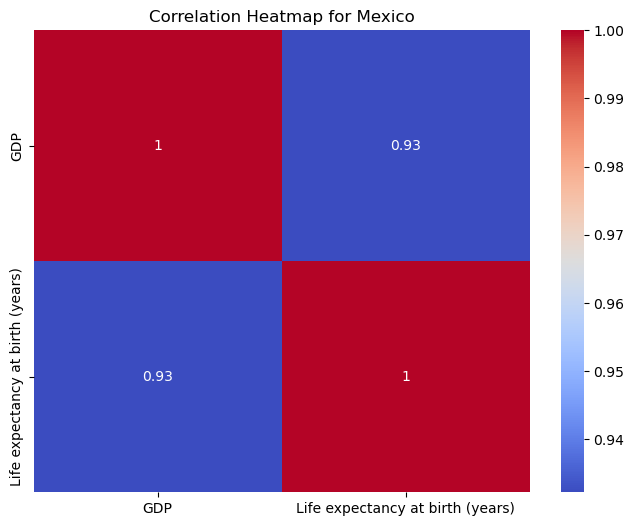

<Figure size 640x480 with 0 Axes>

In [12]:
corr_matrix = mexicos_data[['GDP', 'Life expectancy at birth (years)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Mexico')
plt.show()
plt.clf()

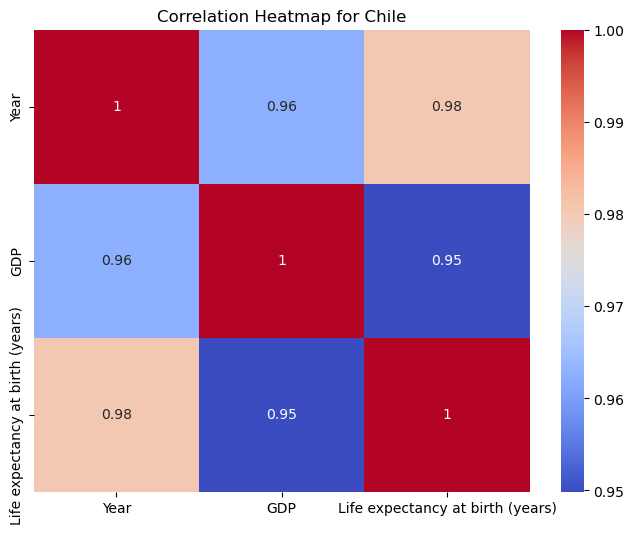

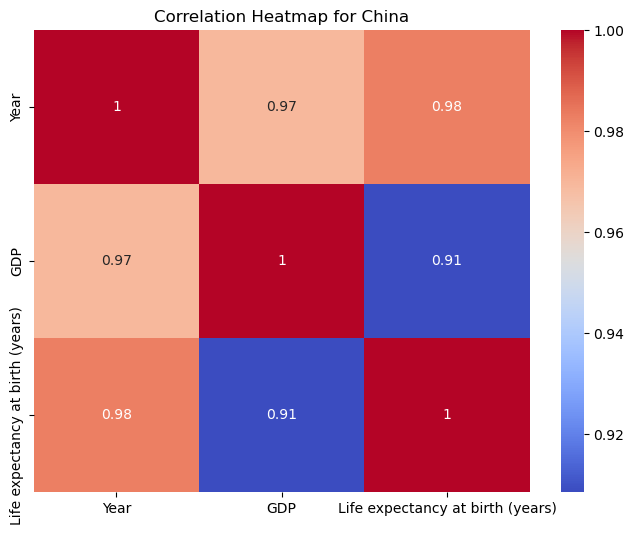

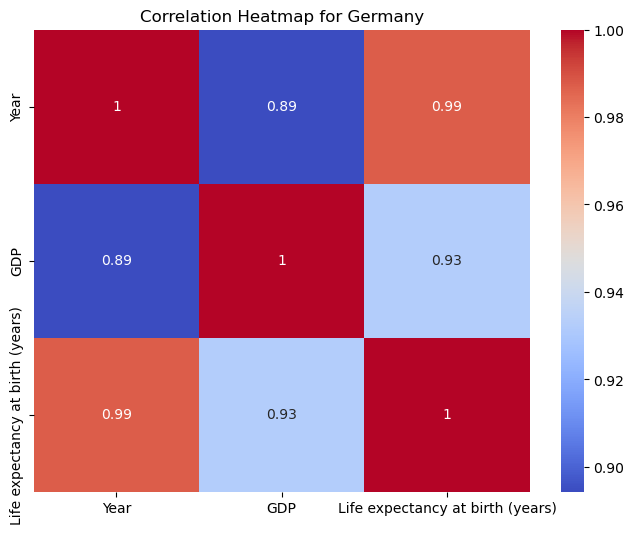

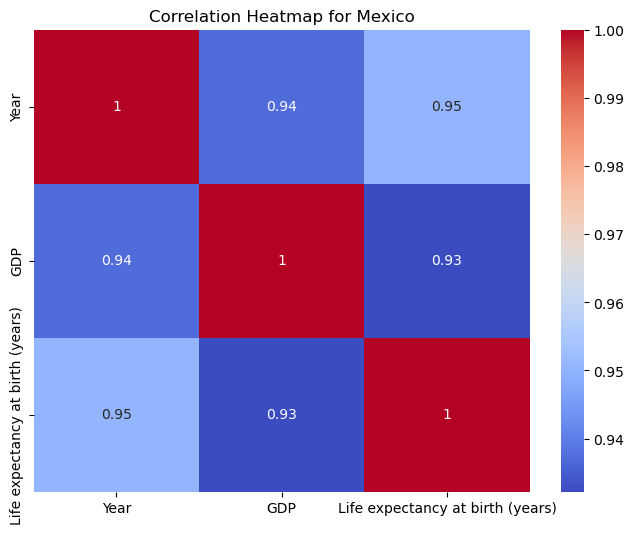

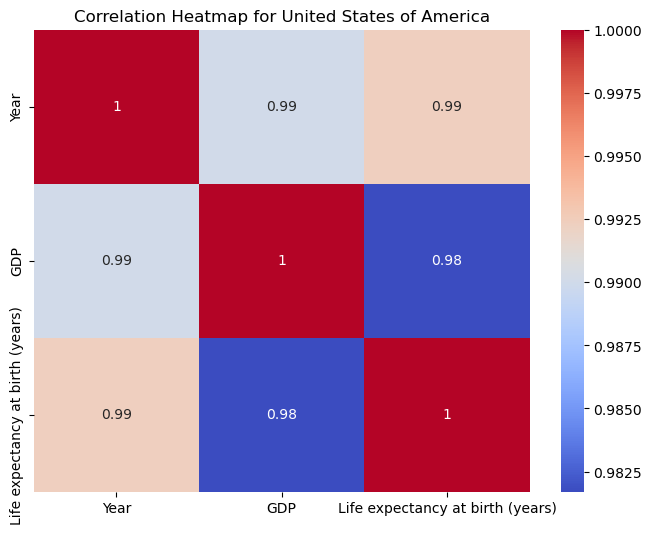

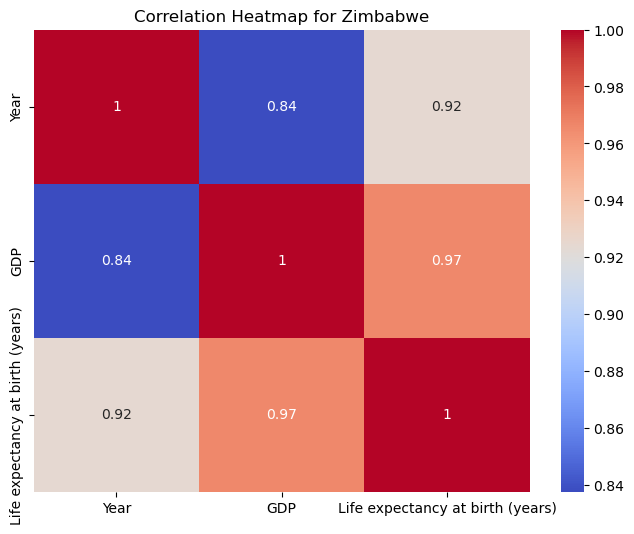

In [16]:
data_for_corr = life_gdp_data[['Country', 'Year', 'GDP', 'Life expectancy at birth (years)']]

# Function to plot heatmap for a country
def plot_heatmap(data, country):
    corr_matrix = data.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap for {country}')
    plt.show()

# Group data by country and plot heatmaps
grouped = data_for_corr.groupby('Country')
for country, data in grouped:
    plot_heatmap(data, country)